## Image Segmentation

### Imports

In [264]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from sklearn import cluster
# Required to calculate Dice Similarity Coefficient

from PIL import Image, ImageOps

# Reduce size of original image to reduce computation time
size = (100,100)

#### Function for displaying images

In [265]:
def plot_two_images(figure_title, image1, label1, image2, label2, 
                    cmap1=None, cmap2=None):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1, cmap = cmap1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2, cmap = cmap2)
    plt.axis('off')
    plt.title(label2)

    plt.show()

#### Function for applying MeanShift algorithm

In [266]:
def apply_meanshift(img):
    
    # TODO: Apply MeanShift to image
    # Consider the following hints as per the lab specification

    # Step 1 - Extract the three RGB colour channels
    
    img = np.array(img)
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    original_shape = red.shape
    print(original_shape)
    red_flatten = red.flatten()
    green_flatten = green.flatten()
    blue_flatten = blue.flatten()
   
    # Step 2 - Store original image shape to be used later in resizing
    # Combine the three colour channels by flattening each channel
    # Then stack the flattened channels together
    # This gives the "colour_samples"
    colour_samples = np.column_stack([red_flatten, green_flatten, blue_flatten])
    
    # Step 3 - Perform MeanShift clustering
    # For larger images this may take a few minutes to compute
    band_width = cluster.estimate_bandwidth(colour_samples, quantile=0.2,n_samples=500)
    print(band_width)
    ms_clf = MeanShift(bandwidth=42,bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples).reshape(original_shape)

    # Step 4 - Reshape ms_labels back to the original image shape
    # for displaying the segmentation output

    return ms_labels

#### Function for applying Watershed algorithm

In [271]:
def apply_watershed(img, threshold=None, plotDistTransform = False):
    # TODO: Apply Watershed to image
    # Consider the following hints as per the lab specification
    # Convert to binary image (note: can also use cv thresholding)
    # Step 1 - Convert the image to grayscale and then binary
    # and convert the image to a numpy matrix\
    img_grey = ImageOps.grayscale(img)
    if threshold is not None:
        img_grey = img_grey.point(lambda x: 0 if x < threshold else 255, '1')
        
    img = np.array(img_grey)
    # Step 2 - Calculate the distance transform
    # Hint: Use ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img)

    # Remember to plot distance transform for Task 2
    
    # Step 3 - Generate the Watershed markers
    # Hint: Use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # Remember to change the local search region for good segmentation results
    # using ndi.label() (note the markers are the 0th output of this function)
    local_max = peak_local_max(distance, footprint=np.ones((13,13)), labels=img)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(local_max.T)] = True
    markers, _ = ndi.label(mask)
    
    # Step 4 - Perform Watershed and store the labels
    # Hint: Use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=img)
    
    return ws_labels, distance

### Q1. Use the MeanShift algorithm for image segmentation

(592, 675)
62.21231801168028


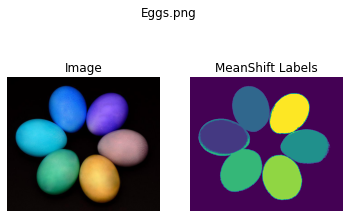

[0 1 2 3 4 5 6]


In [268]:
# Specify path to the test image
img_path = 'Eggs.png'

# Read image
img = Image.open(img_path)
#img.thumbnail(size)

# Apply MeanShift algorithm to the image
ms_labels = apply_meanshift(img)

# Read and plot the original image and MeanShift result
img = cv2.imread('Eggs.png')

plot_two_images(img_path, img, "Image", ms_labels, "MeanShift Labels")
print(np.unique(ms_labels))

In [269]:
plt.imsave('Mean_shift_result.png',ms_labels)

### Q2. Use Watershed transformation for image segmentation

[0 1 2 3 4 5 6]


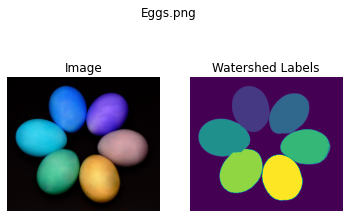

In [272]:
# Read image from img_path as specified above
img = Image.open(img_path)
#img.thumbnail(size)
# Apply Watershed algorithm (remember to plot distance transform as well)
ws_labels, distance = apply_watershed(img,threshold = 58)
print(np.unique(ws_labels))
# Read the original image
img = cv2.imread('Eggs.png')

plot_two_images(img_path, img, "Image", ws_labels, "Watershed Labels")

In [261]:
plt.imsave('Watershed_result.png',ws_labels)

### Q3. Compare MeanShift and Watershed segmentation results

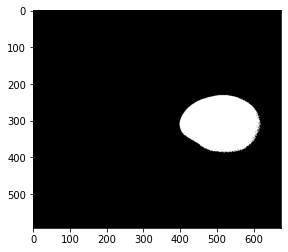

In [225]:
row1,col1 = ms_labels.shape
row2, col2 = ws_labels.shape
ms_mask1 = np.zeros((row1,col1))
ms_mask2 = np.zeros((row1,col1))
ms_mask3 = np.zeros((row1,col1))
ms_mask4 = np.zeros((row1,col1))
ms_mask5 = np.zeros((row1,col1))
ms_mask6 = np.zeros((row1,col1))
for row in range(0, row1):
    for col in range(0,col1):
        if ms_labels[row][col] == 1:
            ms_mask1[row][col] = 255
        if ms_labels[row][col] == 2:
            ms_mask2[row][col] = 255
        if ms_labels[row][col] == 3:
            ms_mask3[row][col] = 255
        if ms_labels[row][col] == 4:
            ms_mask4[row][col] = 255
        if ms_labels[row][col] == 5:
            ms_mask5[row][col] = 255
        if ms_labels[row][col] == 6:
            ms_mask6[row][col] = 255
ws_mask1 = np.zeros((row1,col1))
ws_mask2 = np.zeros((row1,col1))
ws_mask3 = np.zeros((row1,col1))
ws_mask4 = np.zeros((row1,col1))
ws_mask5 = np.zeros((row1,col1))
ws_mask6 = np.zeros((row1,col1))
for row in range(0, row2):
    for col in range(0,col2):
        if ws_labels[row][col] == 1:
            ws_mask1[row][col] = 255
        if ws_labels[row][col] == 2:
            ws_mask2[row][col] = 255
        if ws_labels[row][col] == 3:
            ws_mask3[row][col] = 255
        if ws_labels[row][col] == 4:
            ws_mask4[row][col] = 255
        if ws_labels[row][col] == 5:
            ws_mask5[row][col] = 255
        if ws_labels[row][col] == 6:
            ws_mask6[row][col] = 255
plt.imshow(ws_mask4,'gray')
            #print(ms_labels[row][col])

In [260]:
# List of MaskX.png images
MaskX = ['Mask{}.png'.format(str(idx)) for idx in range(1,7)]

# Generate list of unique MeanShift labels and corresponding label image masks
lbl_ms_unique, counts_ms_label = np.unique(ms_labels,return_counts = True)

ms_masks = [ms_mask1,ms_mask2,ms_mask3,ms_mask4,ms_mask5,ms_mask6]

# Generate list of unique Watershed labels and corresponding label image masks
# Hint: Make sure you have generated reasonable watershed segmentation results
lbl_ws_unique,counts_ws_label = np.unique(ws_labels,return_counts = True)

ws_masks = [ws_mask1,ws_mask2,ws_mask3,ws_mask4,ws_mask5,ws_mask6] 

# Iterate over MaskX.png images and calculate DSC

result_ms = 0
result_ws = 0
for each_maskx_image in MaskX:
    # Read each MaskX.png image
    im1 = Image.open(each_maskx_image)
    #im1.thumbnail(size)

    im1_array = np.array(im1)

    unique1, counts1 = np.unique(im1_array,return_counts = True)
    
    union1 = counts1[1] + counts_ms_label[1]
    union2 = counts1[1] + counts_ms_label[2]
    union3 = counts1[1] + counts_ms_label[3]
    union4 = counts1[1] + counts_ms_label[4]
    union5 = counts1[1] + counts_ms_label[5]
    union6 = counts1[1] + counts_ms_label[6]
    unions = [union1,union2,union3, union4,union5,union6]
    
        #print(union)
    tp, idx = find_mask(im1_array)
    print('Mean shift DSC',2*tp/unions[idx])
    result_ms += 2*tp/unions[idx]
    #print(idx)
    #plt.imshow(ms_mask1,'gray')
    
    # Check DSC for each MeanShift label
    # Check DSC for each Watershed label
    wunion1 = counts1[1] + counts_ws_label[1]
    wunion2 = counts1[1] + counts_ws_label[2]
    wunion3 = counts1[1] + counts_ws_label[3]
    wunion4 = counts1[1] + counts_ws_label[4]
    wunion5 = counts1[1] + counts_ws_label[5]
    wunion6 = counts1[1] + counts_ws_label[6]
    wunions = [wunion1,wunion2,wunion3, wunion4,wunion5,wunion6]
    wtp, widx = wfind_mask(im1_array)
    print('watershed DSC ', 2*wtp/wunions[widx])
    result_ws += 2*wtp/wunions[widx]

print('\n')
print('Mean shift average',result_ms/6)
print('watershed average',result_ws/6)


Mean shift DSC 0.9322454641696784
watershed DSC  0.9902701465201466
Mean shift DSC 0.9430672732009379
watershed DSC  0.9533168553659703
Mean shift DSC 0.9327109625617088
watershed DSC  0.9686016521511606
Mean shift DSC 0.9524062560887047
watershed DSC  0.9720852718561211
Mean shift DSC 0.9069492715163759
watershed DSC  0.9718116609062647
Mean shift DSC 0.9031257182256952
watershed DSC  0.9882209656372336


Mean shift average 0.9284174909605167
watershed average 0.9740510920728161


Watershed segmentation is better than mean shift in this case.
Preprocessing such as image smoothing may be needed to reduce false minima
Postprocessing  such as basin merging could be used to reduce fragmentation

In [249]:
def find_mask(img):
    tpa = 0
    idxa = 0
    for idx, ms in enumerate(ms_masks):
        tp = 0
        for row in range (0, row1):
            for col in range(0,col2):
                if img[row][col] == ms[row][col] and ms[row][col] == 255:
                    tp += 1
        if tp > tpa:
            tpa = tp
            idxa = idx
    return tpa, idxa
        
        

In [252]:
def wfind_mask(img):
    tpa = 0
    idxa = 0
    for idx, ws in enumerate(ws_masks):
        tp = 0
        for row in range (0, row2):
            for col in range(0,col2):
                if img[row][col] == ws[row][col] and ws[row][col] == 255:
                    tp += 1
        if tp > tpa:
            tpa = tp
            idxa = idx
    return tpa, idxa